# Tannis McCartney
## June 21, 2022
## Geospatial Analysis

### Table of Contents
01 Import Libraries

02 Import Dataset

03 Import JSONfile

04 Wrangle data for geospatial analysis

05 Link data and geographic data

06 Chorpleth Map

07 Discussion

# 01 Import Libraries

In [1]:
# Import libraries
import geopandas as gpd
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
#import folium
import json

In [2]:
# Render plots inline
%matplotlib inline

# 02 Import Dataset

In [3]:
# Turn project folder path into a string
path = r'C:\Users\tmmcc\Google Drive\Data Analytics Bootcamp\6 Advanced Analytics and Dashboard Design\Nova Scotia Housing and Income'  

In [4]:
# Load 2018 Canadian Income Survey
CIS2018 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'CIS2018_subset.pkl'))
CIS2018.head()

,household_id,person_id,sample_weight,province,age_group,gender,marital_status,after_tax_income,household_size,household_composition,...,disposable_income_below_mbm_flag,ownership_of_dwelling,monthly_mortgage_payment,monthly_condo_fee,monthly_rent,rent_subsidy_flag,core_housing_need_indicator,adult_food_security_status,child_food_security_status,household_food_security_status
0,2129,212901,208.9708,Ontario,25 to 29 years,Female,Common-law,44265.0,2,Two or more person household/One economic family,...,No,Owned by a member of the household,2000.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Valid skip,Food secure
1,2129,212902,208.9708,Ontario,25 to 29 years,Male,Common-law,42985.0,2,Two or more person household/One economic family,...,No,Owned by a member of the household,2000.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Valid skip,Food secure
2,2130,213001,1101.2217,British Columbia,45 to 49 years,Female,Common-law,82370.0,2,Two or more person household/One economic family,...,No,Not owned by a member of the household,NaN,NaN,2900.0,No,Not in core housing need,Food secure,Valid skip,Food secure
3,2130,213002,1101.2217,British Columbia,55 to 59 years,Female,Common-law,49105.0,2,Two or more person household/One economic family,...,No,Not owned by a member of the household,NaN,NaN,2900.0,No,Not in core housing need,Food secure,Valid skip,Food secure
4,2131,213101,165.3016,Saskatchewan,55 to 59 years,Female,Married,21000.0,2,Two or more person household/One economic family,...,No,Owned by a member of the household,1600.0,NaN,NaN,Valid skip,Not in core housing need,Food secure,Valid skip,Food secure


In [5]:
# Check shape of dataframe
CIS2018.shape

(94336, 24)

In [6]:
# Check spelling etc of provinces
CIS2018['province'].value_counts(dropna=False)

Ontario                      25419
Quebec                       17059
British Columbia             10447
Alberta                      10271
Manitoba                      7681
Saskatchewan                  7004
Nova Scotia                   5111
New Brunswick                 5049
Newfoundland and Labrador     3625
Prince Edward Island          2670
Name: province, dtype: int64

Data for the three Canadian territories was not included in the original PUMF even though 2018 was the first year it was collected.

# 03 Import JSONfile

In [7]:
# Import GeoJSON file
with open (r'C:/Users/tmmcc/Google Drive/Data Analytics Bootcamp/6 Advanced Analytics and Dashboard Design/Nova Scotia Housing and Income/02 Data/Original Data/Canada_provinces.geojson') as jsonFile:
    prov_geo = json.load(jsonFile)

In [8]:
# Use geopandas to turn features into geometries
prov_gdf = gpd.GeoDataFrame.from_features(prov_geo['features'])

In [9]:
# Check GeoDataFrame
prov_gdf.head()

,geometry,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR
0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.
1,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",11,Prince Edward Island / ÃŽle-du-Prince-Ã‰douard,Prince Edward Island,ÃŽle-du-Prince-Ã‰douard,P.E.I.,ÃŽ.-P.-Ã‰.
2,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",12,Nova Scotia / Nouvelle-Ã‰cosse,Nova Scotia,Nouvelle-Ã‰cosse,N.S.,N.-Ã‰.
3,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.
4,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",24,Quebec / QuÃ©bec,Quebec,QuÃ©bec,Que.,Qc


In [10]:
# Remove extra columns
prov_gdf = prov_gdf.drop(columns=['PRNAME', 'PRFNAME', 'PRFABBR'])
prov_gdf.head()

,geometry,PRUID,PRENAME,PREABBR
0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",10,Newfoundland and Labrador,N.L.
1,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",11,Prince Edward Island,P.E.I.
2,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",12,Nova Scotia,N.S.
3,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",13,New Brunswick,N.B.
4,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",24,Quebec,Que.


<AxesSubplot:>

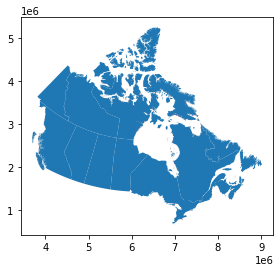

In [11]:
# Check map data
prov_gdf.plot()

GeoPandas was used instead of folium to be able to produce maps using a Lambert Conformal Conic projection, which doesn't distort northern Canada as much. The GeoJSON file was exported from QGIS in a Statistics Canada Lambert Conformal Projection.

# 04 Wrangle data for geospatial analysis

In [12]:
# Create subset for geospatial analysis
df = CIS2018[['province', 'sample_weight', 'household_maj_income_flag', 'after_tax_low_income_flag']]

In [13]:
# Rename province to match GeoJSON file
df = df.rename(columns={'province':'PRENAME'})
df.head()

,PRENAME,sample_weight,household_maj_income_flag,after_tax_low_income_flag
0,Ontario,208.9708,Yes,No
1,Ontario,208.9708,No,No
2,British Columbia,1101.2217,Yes,No
3,British Columbia,1101.2217,No,No
4,Saskatchewan,165.3016,No,No


In [14]:
# Create a subset to look at households only
df_households = df.loc[df['household_maj_income_flag']=='Yes']
df_households.shape

(40857, 4)

In [15]:
# Check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94336 entries, 0 to 94335
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRENAME                    94336 non-null  object 
 1   sample_weight              94336 non-null  float64
 2   household_maj_income_flag  94336 non-null  object 
 3   after_tax_low_income_flag  94336 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.9+ MB


In [16]:
# Apply the sample weight to get the total number of households in Canada
s1 = df_households.groupby('PRENAME')['sample_weight'].sum()
round(s1)

PRENAME
Alberta                      1612780.0
British Columbia             1964453.0
Manitoba                      498901.0
New Brunswick                 323211.0
Newfoundland and Labrador     218825.0
Nova Scotia                   410841.0
Ontario                      5552006.0
Prince Edward Island           62292.0
Quebec                       3664716.0
Saskatchewan                  442319.0
Name: sample_weight, dtype: float64

In [17]:
# Convert total number of households series to dataframe
df1 = pd.DataFrame({'PRENAME':s1.index, 'household_count':s1.values})
round(df1.head())

,PRENAME,household_count
0,Alberta,1612780.0
1,British Columbia,1964453.0
2,Manitoba,498901.0
3,New Brunswick,323211.0
4,Newfoundland and Labrador,218825.0


In [18]:
# Create a subset to look at low-incomehouseholds only
df_li_households = df_households.loc[df_households['after_tax_low_income_flag']=='Yes']
df_li_households.shape

(2739, 4)

In [19]:
# Apply the sample weight to get the total number of low-income households in Canada
s2 = df_li_households.groupby('PRENAME')['sample_weight'].sum()
round(s2)

PRENAME
Alberta                      101197.0
British Columbia             160426.0
Manitoba                      48224.0
New Brunswick                 19265.0
Newfoundland and Labrador     14255.0
Nova Scotia                   33302.0
Ontario                      552584.0
Prince Edward Island           3152.0
Quebec                       409183.0
Saskatchewan                  33320.0
Name: sample_weight, dtype: float64

In [20]:
# Convert total number of low-income households series to dataframe
df2 = pd.DataFrame({'PRENAME':s2.index, 'li_household_count':s2.values})
round(df2.head())

,PRENAME,li_household_count
0,Alberta,101197.0
1,British Columbia,160426.0
2,Manitoba,48224.0
3,New Brunswick,19265.0
4,Newfoundland and Labrador,14255.0


# 05 Link data and geographic data

In [21]:
# Merge geodataframe and households dataframe on prename
prov_geo_temp = prov_gdf.merge(df1, on = 'PRENAME', how='left')
gdf = gpd.GeoDataFrame(prov_geo_temp)

In [22]:
# Merge geodataframe and low-income households dataframe on prename
prov_geo_house = prov_geo_temp.merge(df2, on = 'PRENAME', how='left')
gdf = gpd.GeoDataFrame(prov_geo_house)

In [23]:
# Add calculated field to get proportion of low-income households
prov_geo_house['li_prop'] = (prov_geo_house['li_household_count'] / prov_geo_house['household_count']) * 100

In [24]:
# Check data
round(prov_geo_house.head())

,geometry,PRUID,PRENAME,PREABBR,household_count,li_household_count,li_prop
0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",10,Newfoundland and Labrador,N.L.,218825.0,14255.0,7.0
1,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",11,Prince Edward Island,P.E.I.,62292.0,3152.0,5.0
2,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",12,Nova Scotia,N.S.,410841.0,33302.0,8.0
3,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",13,New Brunswick,N.B.,323211.0,19265.0,6.0
4,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",24,Quebec,Que.,3664716.0,409183.0,11.0


In [25]:
# View dataframe
prov_geo_house

,geometry,PRUID,PRENAME,PREABBR,household_count,li_household_count,li_prop
0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",10,Newfoundland and Labrador,N.L.,2.188250e+05,14254.7545,6.514226
1,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",11,Prince Edward Island,P.E.I.,6.229200e+04,3152.1948,5.060353
2,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",12,Nova Scotia,N.S.,4.108410e+05,33302.1614,8.105851
3,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",13,New Brunswick,N.B.,3.232110e+05,19264.6376,5.960390
4,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",24,Quebec,Que.,3.664716e+06,409183.0778,11.165479
5,"MULTIPOLYGON (((6378815.614 2295412.440, 63787...",35,Ontario,Ont.,5.552006e+06,552583.7773,9.952867
6,"MULTIPOLYGON (((6039656.509 2636304.343, 60396...",46,Manitoba,Man.,4.989010e+05,48223.9666,9.666039
7,"MULTIPOLYGON (((5248633.914 2767057.263, 52492...",47,Saskatchewan,Sask.,4.423190e+05,33319.6658,7.532949
8,"MULTIPOLYGON (((5228304.177 2767597.891, 52280...",48,Alberta,Alta.,1.612780e+06,101196.5526,6.274666
9,"MULTIPOLYGON (((4018904.414 3410247.271, 40194...",59,British Columbia,B.C.,1.964453e+06,160425.9215,8.166442


In [26]:
# Drop rows with territories because they have no data
prov_geo_house = prov_geo_house.drop(
                labels =[10, 11, 12],
                axis = 0)
prov_geo_house

,geometry,PRUID,PRENAME,PREABBR,household_count,li_household_count,li_prop
0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",10,Newfoundland and Labrador,N.L.,2.188250e+05,14254.7545,6.514226
1,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",11,Prince Edward Island,P.E.I.,6.229200e+04,3152.1948,5.060353
2,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",12,Nova Scotia,N.S.,4.108410e+05,33302.1614,8.105851
3,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",13,New Brunswick,N.B.,3.232110e+05,19264.6376,5.960390
4,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",24,Quebec,Que.,3.664716e+06,409183.0778,11.165479
5,"MULTIPOLYGON (((6378815.614 2295412.440, 63787...",35,Ontario,Ont.,5.552006e+06,552583.7773,9.952867
6,"MULTIPOLYGON (((6039656.509 2636304.343, 60396...",46,Manitoba,Man.,4.989010e+05,48223.9666,9.666039
7,"MULTIPOLYGON (((5248633.914 2767057.263, 52492...",47,Saskatchewan,Sask.,4.423190e+05,33319.6658,7.532949
8,"MULTIPOLYGON (((5228304.177 2767597.891, 52280...",48,Alberta,Alta.,1.612780e+06,101196.5526,6.274666
9,"MULTIPOLYGON (((4018904.414 3410247.271, 40194...",59,British Columbia,B.C.,1.964453e+06,160425.9215,8.166442


# 06 Choropleth Map

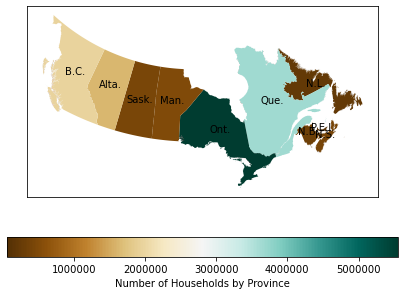

In [42]:
# Make choropleth map of Number of households in each province
households = prov_geo_house.plot(column='household_count',
                 legend=True,
                 legend_kwds={'label': "Number of Households by Province",
                             'orientation': "horizontal",
                             'format':"%.0f"},
                 cmap='BrBG',
                 figsize=(7,5))
households.set_xticks([])
households.set_yticks([])

prov_geo_house.apply(lambda x: households.annotate(text=x['PREABBR'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

plt.show()

Because there is no data from the territories in the 2018 Canadian Income Survey PUMF, they are not displayed here.

This map shows that Ontario has the highest number of Canadian households. Households, instead of persons, was mapped to be more consistent with previous analysis done for this project. 

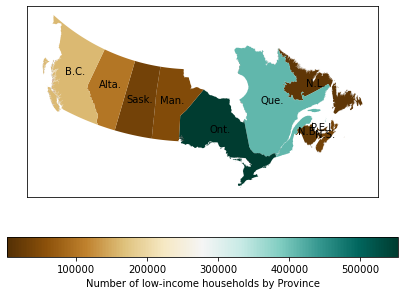

In [43]:
# Make choropleth map of number of low-income households in each province
li_households = prov_geo_house.plot(column='li_household_count',
                 legend=True,
                 legend_kwds={'label': "Number of low-income households by Province",
                             'orientation': "horizontal",
                             'format':"%.0f"},
                 cmap='BrBG',
                 figsize=(7,5))
li_households.set_xticks([])
li_households.set_yticks([])

prov_geo_house.apply(lambda x: li_households.annotate(text=x['PREABBR'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

plt.show()

This map, of the number of low-income households in each province, doesn't look much different from the first map, except that the scale is different. So the distribution of low-income households is consitent with the distribution of households.

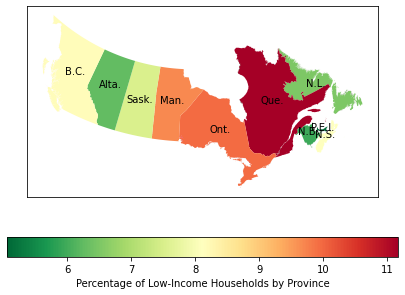

In [46]:
# Make choropleth map of proportion of low-income households in each province
li_pct_households = prov_geo_house.plot(column='li_prop',
                 legend=True,
                 legend_kwds={'label': "Percentage of Low-Income Households by Province",
                             'orientation': "horizontal",
                             'format':"%.0f"},
                 cmap='RdYlGn_r',
                 figsize=(7,5))
li_pct_households.set_xticks([])
li_pct_households.set_yticks([])

prov_geo_house.apply(lambda x: li_pct_households.annotate(text=x['PREABBR'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

plt.show()

This map shows the percentage of low-income households in each province (i.e. the ratio of the data from the second map to the data from the first map).

This shows that Quebec has the highest percentage of low-income households, while New Brunswick has the lowest. Nova Scotia, the province of interest for this study, has about the fourth or fifth highest percentage of low-income households (out of ten provinces).

# 07 Discussion

##### Where do Canadians live?

This question is answered by the first map. There are more Canadian households in the larger (by area) provinces. Ontario has the highest number of households, while the Atlantic provinces (Nova Scotia, New Brunswick, Prince Edward Island, and Newfoundland and Labrador) have the lowest.

This map leads to another question: 
- What is the proportion of households to the area of each province (i.e. the population density of each province). 

##### Where do low-income Canadians live?

This question is answered by the second map. The highest number of low-income households is in Ontario and the lowest number is in the Atlantic Provinces. 

A better way to consider this is to look at the proportion of low-income households to total number of households in each province, as shown in the third map. Quebec has the highest percentage of low-income households, followed by Ontario and Manitoba. Prince Edward Island and New Brunswick have the lowest percentage. In this map, there is actually some differentiation among the Atlantic provinces.

This leads to the question, where is the distribution of after-tax income most skewed?